# Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df_ori = pd.read_csv('test-case.csv')
df = df_ori.copy()

In [3]:
# Inspect Data

In [4]:
df.head()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10/27/2024,Operational,"8,085,000","404,000,000"
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11/10/2024,Operational,"4,858,000","330,450,000"
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11/15/2024,Operational,"9,266,000","653,400,000"
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10/27/2024,Operational,"5,881,000","302,000,000"
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11/25/2024,Operational,"6,946,000","228,200,000"


In [5]:
df.shape

(30933, 7)

In [6]:
df.columns

Index(['customer_name', 'dealer_name', 'unit_description', 'due_date',
       'status', ' installment ', ' cost_price '],
      dtype='object')

In [7]:
# Fixing columns name
df.columns = [col.strip('* ') for col in df.columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30933 entries, 0 to 30932
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_name     30933 non-null  object
 1   dealer_name       30933 non-null  object
 2   unit_description  30933 non-null  object
 3   due_date          29197 non-null  object
 4   status            30933 non-null  object
 5   installment       30933 non-null  object
 6   cost_price        30933 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


# No 1

Perform data cleaning on the dataset, starting to address missing values, duplication, or formatting errors.

## Change Data Type

In [9]:
def str_to_date(date):
    try:
        dt = datetime.strptime(date, "%m/%d/%Y")
        result = dt.strftime("%m-%d-%Y")
        return result
    except:
        None

In [10]:
# Change object to float
df.cost_price = df.cost_price.apply(lambda x: float(x.replace(',','')))
df.installment = df.installment.apply(lambda x: float(x.replace(',','')))

In [11]:
# Change due_date dtype
df.due_date = df.due_date.apply(lambda x: str_to_date(x))

In [12]:
df.head()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10-27-2024,Operational,8085000.00,404000000.00
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11-10-2024,Operational,4858000.00,330450000.00
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11-15-2024,Operational,9266000.00,653400000.00
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10-27-2024,Operational,5881000.00,302000000.00
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11-25-2024,Operational,6946000.00,228200000.00


## Missing Value

In [13]:
df_ori.isnull().sum()

customer_name          0
dealer_name            0
unit_description       0
due_date            1736
status                 0
 installment           0
 cost_price            0
dtype: int64

In [14]:
df[df.due_date.isnull()].status.value_counts()

Incomplete                 1719
Expired with Due Amount      10
Write-off                     7
Name: status, dtype: int64

In [15]:
# All incomplete status has Null due_date
df[(df.status == 'Incomplete') & (df.due_date.notna())].head()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price


## Duplicate data

In [16]:
# Check duplicate data and the number of duplicated data

In [17]:
df.duplicated(subset = ['customer_name', 'dealer_name',
                        'unit_description', 'due_date','status',
                        'installment', 'cost_price']).any()

True

In [18]:
df.duplicated(subset = ['customer_name', 'dealer_name',
                        'unit_description', 'due_date','status',
                        'installment', 'cost_price']).sum()

527

In [19]:
df[df.duplicated(subset = ['customer_name', 'dealer_name',
                        'unit_description', 'due_date','status',
                        'installment', 'cost_price'])].head(2)

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
3855,AYU LESTARI,HONDA NAGOYA,"HONDA, BRIO SATYA 1.2 E CVT, 2023",10-27-2024,Operational,4750000.00,244500000.00
5040,CV. AMI GROUP,PT. GITA RIAU MAKMUR,"HINO, DUTRO 136 HDX PTO + DUMP, 2022",08-27-2024,Operational,13183000.00,560000000.00


In [20]:
# DATA DUPLICATE SAMPLE
df[df.customer_name == 'AYU LESTARI']

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
3853,AYU LESTARI,INT - CAB MEDAN - MUHAMMAD INSAN KAMIL NASUTION,"HONDA, BRIO SATYA 1.2 E MT CKD, 2022",11-08-2024,Operational,4055000.00,163000000.00
3854,AYU LESTARI,HONDA NAGOYA,"HONDA, BRIO SATYA 1.2 E CVT, 2023",10-27-2024,Operational,4750000.00,244500000.00
3855,AYU LESTARI,HONDA NAGOYA,"HONDA, BRIO SATYA 1.2 E CVT, 2023",10-27-2024,Operational,4750000.00,244500000.00
3856,AYU LESTARI,AUTOJOY,"HONDA, CITY E AT, 2012",11-25-2024,Operational,3149000.00,157000000.00


In [21]:
# Drop duplicate data
df = df.drop_duplicates(subset = ['customer_name', 'dealer_name',
                        'unit_description', 'due_date','status',
                        'installment', 'cost_price'])

In [22]:
# Check duplicate data after drop_duplicates 
df.duplicated(subset = ['customer_name', 'dealer_name',
                        'unit_description', 'due_date','status',
                        'installment', 'cost_price']).any()

False

# No 2

Perform data manipulation on the unit_description column, breaking it into 3 new columns
with the column names (brand_name, type_car, year_of_car).

In [23]:
df['brand_name'] = df['unit_description'].apply(lambda x: x.split(',')[0].strip())
df['type_car'] = df['unit_description'].apply(lambda x: x.split(',')[1].strip())
df['year_of_car'] = df['unit_description'].apply(lambda x: x.split(',')[2].strip())

In [24]:
df.head()

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10-27-2024,Operational,8085000.00,404000000.00,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11-10-2024,Operational,4858000.00,330450000.00,HONDA,ALL NEW BR-V E CVT,2023
2,BHARATH SRINIVASAN SETHURAMAN,HONDA MANDIRI BOGOR,"HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022",11-15-2024,Operational,9266000.00,653400000.00,HONDA,ALL NEW CRV 1.5 TURBO PRESTIGE,2022
3,MARSUDIN,HONDA CIKARANG,"HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021",10-27-2024,Operational,5881000.00,302000000.00,HONDA,ALL NEW CITY HATCHBACK RS CVT,2021
4,NI NYOMAN PUJI ASTUTI,HONDA BINTANG TABANAN,"HONDA, ALL NEW BRIO E CVT, 2024",11-25-2024,Operational,6946000.00,228200000.00,HONDA,ALL NEW BRIO E CVT,2024


# No 3

Count the number of cars based on type_car

In [27]:
type_car_count = df.groupby('type_car').agg({'customer_name': 'count'}).reset_index()\
.rename(columns ={'customer_name' : 'cnt'}).sort_values('cnt',ascending = False)

In [28]:
type_car_count.head()

,type_car,cnt
89,ALL NEW BRIO E CVT,3337
418,BRIO SATYA E CVT,2329
90,ALL NEW BRIO E MT,1994
419,BRIO SATYA E MT,1507
91,ALL NEW BRIO RS CVT,724


# No 4

Look for the price of the car and installments that are the most expensive to the cheapest

In [29]:
price_and_installment = df[['unit_description','cost_price','installment']]\
                        .sort_values(by = ['cost_price','installment'], ascending = False).drop_duplicates()

In [30]:
price_and_installment.head(10)

,unit_description,cost_price,installment
21072,"FERRARI, SF 90 SPIDER, 2022",17500000000.00,375355000.00
21467,"SANY, Wide Body Mining SKT 80S, 2022",14000000000.00,244445000.00
21319,"MESIN, RECYCLE PROCESS, 2013",11124961646.00,179106000.00
21236,"HINO, RANGER EURO 4 FM 280 JD + KAROSERI, 2022",7500000000.00,149865000.00
20900,"UD TRUCK, Quester CWE 280 WB 4300, 2022",6993910000.00,168637000.00
20853,"WORKSHOP EQUIPMENT, EQUIPMENT, 2022",6704219021.00,91819000.00
14258,"MITSUBISHI, FE 84 + KAROSERI, 2022",5636000000.00,112720000.00
20684,"HINO, FM 280 JD + DUMP, 2022",5400000000.00,160334000.00
20220,"KOMATSU, WA800-3A, 2014",5000000000.00,175245000.00
20219,"KOMATSU, WA800-3A, 2014",5000000000.00,174139000.00


# No 5

Then analyze the dataset with the concept of Exploratory Data Analysis (EDA)

In [31]:
# Describe

In [32]:
df[['installment','cost_price']].describe()

,installment,cost_price
count,30406.00,30406.00
mean,6011832.75,277288195.69
std,12465351.55,240458603.78
min,320000.00,11272727.00
25%,3517000.00,188000000.00
50%,4355000.00,225200000.00
75%,6161000.00,327600000.00
max,782681940.00,17500000000.00


In [33]:
df.describe(include = 'all')

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
count,30406,30406,30406,28706,30406,30406.00,30406.00,30406,30406,30406
unique,27212,1307,4198,917,5,NaN,NaN,66,2024,42
top,PT. TRANS ARMADA INDONESIA,HONDA CIKARANG,"HONDA, ALL NEW BRIO E CVT, 2023",10-27-2024,Operational,NaN,NaN,HONDA,ALL NEW BRIO E CVT,2023
freq,46,1288,1227,9656,27132,NaN,NaN,23973,3337,8305
mean,NaN,NaN,NaN,NaN,NaN,6011832.75,277288195.69,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,12465351.55,240458603.78,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,320000.00,11272727.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3517000.00,188000000.00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4355000.00,225200000.00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,6161000.00,327600000.00,NaN,NaN,NaN


In [34]:
# Outlier

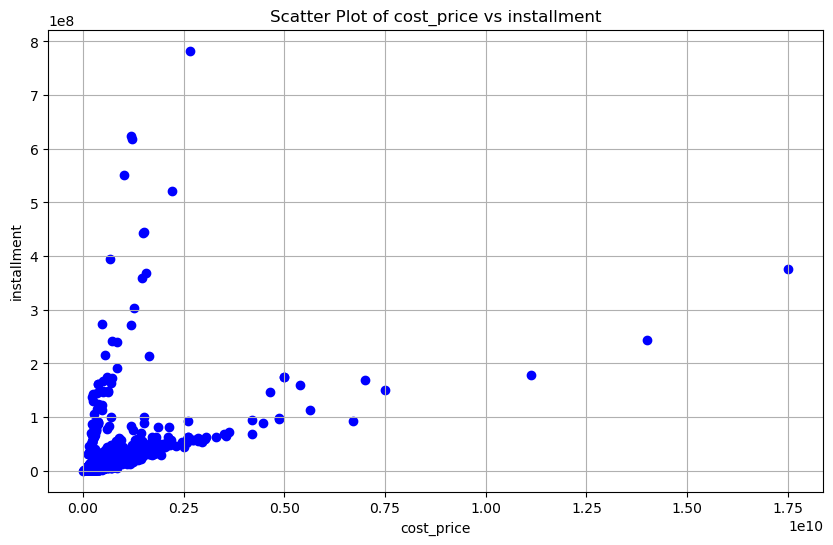

In [35]:
# Installment and cost_price anomaly
plt.figure(figsize=(10, 6))
plt.scatter(x = df['cost_price'], y = df['installment'], color='blue', marker='o')
plt.title('Scatter Plot of cost_price vs installment')
plt.xlabel('cost_price')
plt.ylabel('installment') 
plt.grid(True)
plt.show()

# No 6

In [36]:
'''
Make a Data Visualization based on :
a. Top 10 Most Sold Car Brands
b. Top Most Sold Car Models/Types using treemap
c. Distribution of Status Type
d. Top 10 Most Frequent Customers
e. Top 10 Most Frequent Dealers
'''

'\nMake a Data Visualization based on :\na. Top 10 Most Sold Car Brands\nb. Top Most Sold Car Models/Types using treemap\nc. Distribution of Status Type\nd. Top 10 Most Frequent Customers\ne. Top 10 Most Frequent Dealers\n'

## Top 10 Most Sold Car Brands

In [37]:
df.head(2)

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10-27-2024,Operational,8085000.00,404000000.00,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11-10-2024,Operational,4858000.00,330450000.00,HONDA,ALL NEW BR-V E CVT,2023


In [38]:
car_brand = df.groupby('brand_name').agg({'customer_name' : 'count'}).reset_index()\
.rename(columns ={'customer_name' : 'cnt'}).sort_values('cnt',ascending = False)
top_car_brand = car_brand.head(10)

In [39]:
car_brand.shape

(66, 2)

In [40]:
top_car_brand['percentage'] = top_car_brand.cnt.apply(lambda x: x/df.shape[0]*100)

In [41]:
top_car_brand

,brand_name,cnt,percentage
23,HONDA,23973,78.84
59,TOYOTA,1856,6.10
65,WULING,1373,4.52
44,MITSUBISHI,935,3.08
58,SUZUKI,527,1.73
12,DAIHATSU,399,1.31
24,HYUNDAI,240,0.79
47,NISSAN,215,0.71
37,MAZDA,212,0.70
9,CHERY,116,0.38


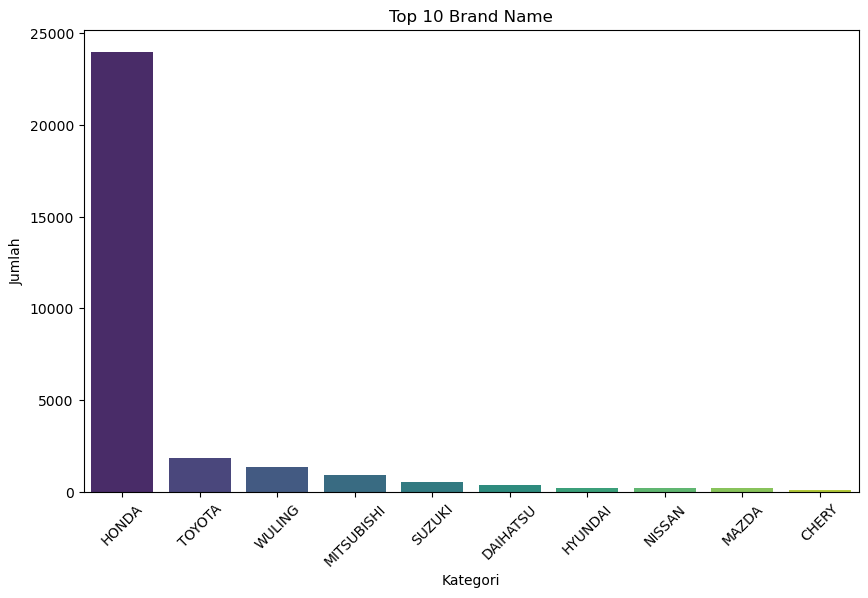

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='brand_name', y='cnt', data=top_car_brand, palette='viridis')
plt.title('Top 10 Brand Name')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

## Top Most Sold Car Models/Types using treemap

In [43]:
top_type_car = type_car_count.head(10)

In [44]:
top_type_car

,type_car,cnt
89,ALL NEW BRIO E CVT,3337
418,BRIO SATYA E CVT,2329
90,ALL NEW BRIO E MT,1994
419,BRIO SATYA E MT,1507
91,ALL NEW BRIO RS CVT,724
150,ALL NEW HR-V 1.5L SE CVT,717
400,BRIO RS CVT,598
409,BRIO SATYA 1.2 E CVT,415
1449,Mobilio S MT,397
184,ALL NEW WR-V 1.5 RS CVT,385


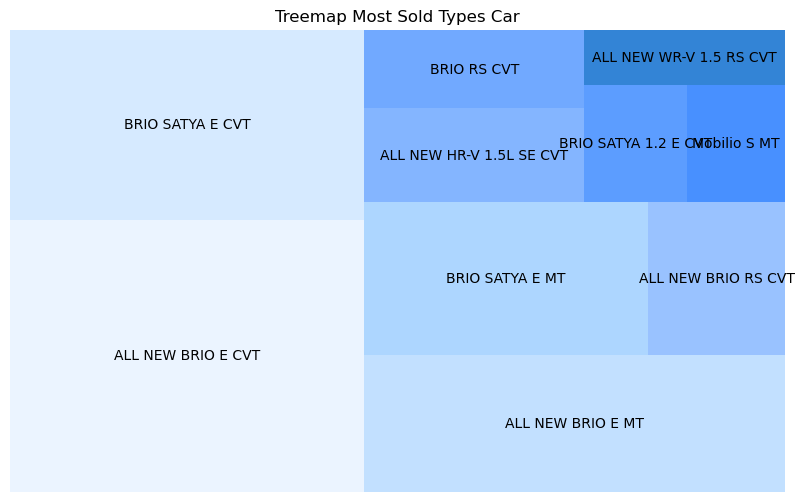

In [45]:
colors =['#e6f2ff','#cce5ff','#b3d9ff','#99ccff','#80b3ff','#66a3ff','#4d94ff','#3385ff','#1a75ff','#0066cc']
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_type_car.cnt, label=top_type_car.type_car, color=colors, alpha=.8)
plt.title('Treemap Most Sold Types Car')
plt.axis('off')
plt.show()

## Distribution of Status Type

In [46]:
df.status.value_counts()

Operational                27132
Incomplete                  1683
Write-off                   1485
Expired with Due Amount      104
Termination in progress        2
Name: status, dtype: int64

In [47]:
df.status.value_counts(normalize = True)

Operational               0.89
Incomplete                0.06
Write-off                 0.05
Expired with Due Amount   0.00
Termination in progress   0.00
Name: status, dtype: float64

In [48]:
status_dist = df.status.value_counts(normalize = True).reset_index().rename(columns = {'index' : 'status'
                                                                        ,'status' : 'percentage'})

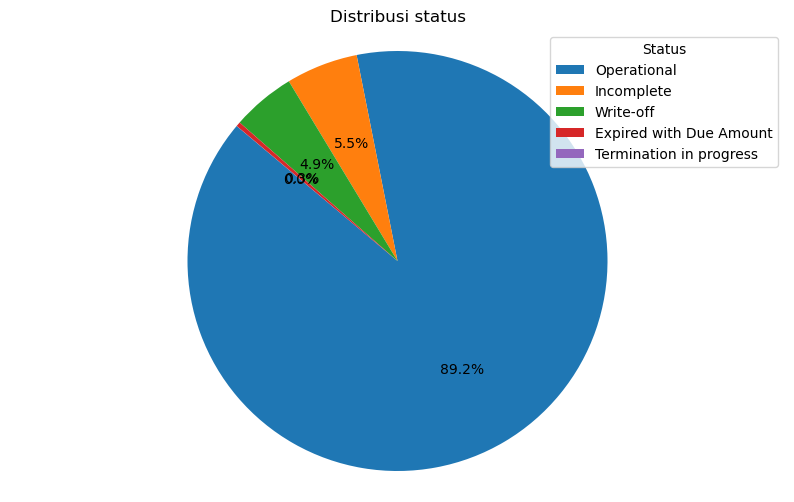

In [49]:
plt.figure(figsize=(10, 6))
plt.pie(status_dist['percentage'], autopct='%1.1f%%', startangle=140)
plt.legend(status_dist['status'], title='Status', loc='upper right')
plt.title('Distribusi status')
plt.axis('equal')
plt.show()

## Top 10 Most Frequent Customers

In [50]:
df.head(2)

,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price,brand_name,type_car,year_of_car
0,AMRUL QOIS,HYUNDAI MAMPANG,"HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022",10-27-2024,Operational,8085000.00,404000000.00,HYUNDAI,CRETA PRIME 1.5 SINGLE TONE IVT,2022
1,AZIZATUL MUNIFAH,HONDA MANDALASENA,"HONDA, ALL NEW BR-V E CVT, 2023",11-10-2024,Operational,4858000.00,330450000.00,HONDA,ALL NEW BR-V E CVT,2023


In [53]:
most_cust = df.groupby('customer_name').agg({'dealer_name' : 'count'}).reset_index()\
.rename(columns ={'dealer_name' : 'cnt'}).sort_values('cnt',ascending = False)
top_most_cust = most_cust.head(10)

In [54]:
top_most_cust

,customer_name,cnt
18876,PT. TRANS ARMADA INDONESIA,46
18585,PT. IMORA MOTOR,27
10042,HENDRA,21
16223,MULYADI,21
23023,SRI WAHYUNI,19
18408,PT. ARTA BUMI MOTOR,18
18888,PT. UMARA NIKMAT BOGA,15
18512,PT. DUA RAJA BALOHAN,15
17589,NURHAYATI,14
23898,SUTRISNO,14


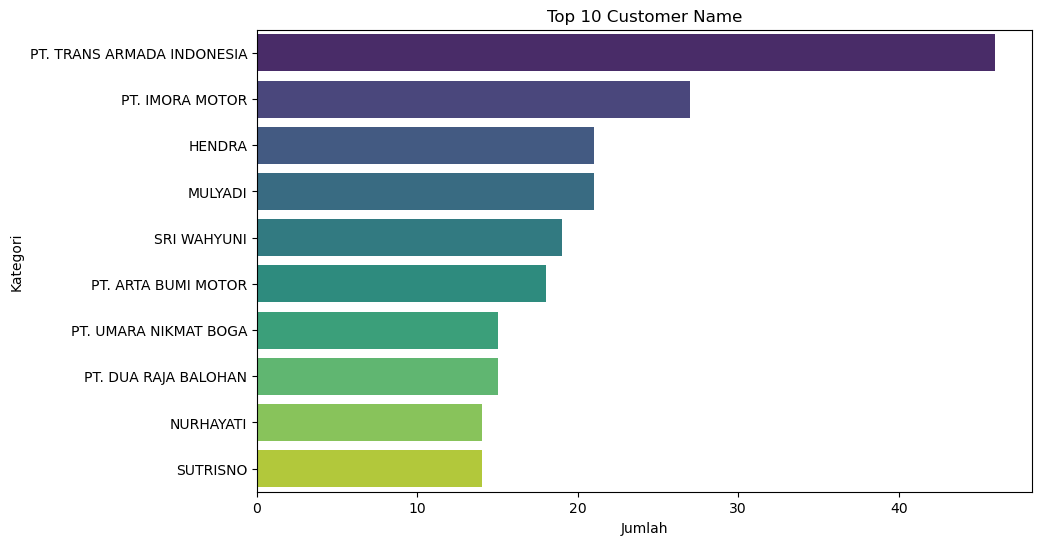

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(y='customer_name', x='cnt', data=top_most_cust, palette='viridis')
plt.title('Top 10 Customer Name')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

## Top 10 Most Frequent Dealers

In [56]:
most_dealer = df.groupby('dealer_name').agg({'customer_name' : 'count'}).reset_index()\
.rename(columns ={'customer_name' : 'cnt'}).sort_values('cnt',ascending = False)
top_most_dealer = most_dealer.head(10)

In [57]:
top_most_dealer

,dealer_name,cnt
419,HONDA CIKARANG,1288
536,HONDA WILTOP JAMBI,1094
479,HONDA NAGOYA,655
515,HONDA SURABAYA CENTER,594
381,HONDA AMARTHA SAMARINDA,592
445,HONDA JAKARTA CENTER,568
395,HONDA ARISTA PEKANBARU,489
382,HONDA ANUGERAH KASIH PUTERA,472
418,HONDA CIBUBUR,470
460,HONDA MAKASSAR INDAH,424


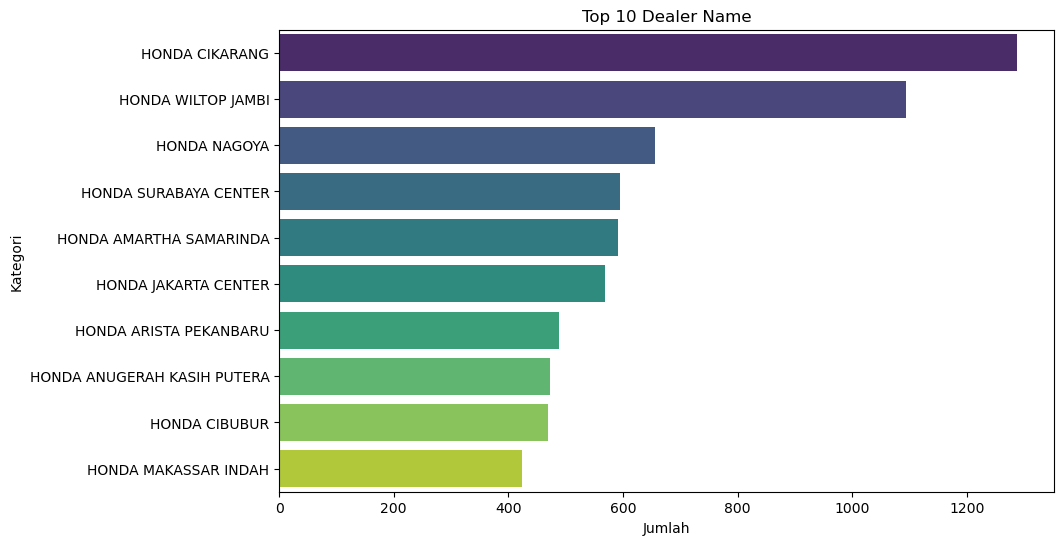

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(y='dealer_name', x='cnt', data=top_most_dealer, palette='viridis')
plt.title('Top 10 Dealer Name')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()